In [1]:
# Importing modules
import pandas as pd
import os

os.chdir('..')


In [2]:
# Read data into blogPosts
blogPosts = pd.read_csv('./data/Indo-pacific-blog-data.csv')

# Print head
# This shows us the content of the crawled blog data for analysis purpose
blogPosts.head()

,blogpost_id,title,date,blogger,categories,post,post_length,num_outlinks,num_inlinks,num_comments,comments_url,permalink,blogsite_id,tags,location,sentiment,language,influence_score,last_modified_time
0,1,Ukraine and the ‘New Cold War: The Return of N...,2014-06-04 00:00:00,Matt Finucane,NaN,Whether the Crimean crisis heralds a new era o...,4777,12,0,2,NaN,http://afieldofviews.wordpress.com/2014/06/04/...,1,"Crimea, EU, Finland, Hungary, IMF, Neutralism,...",ES,-0.353554,English,0.0,2020-07-21 12:30:00
1,2,Guest Post: China and the Crimea Conundrum,2014-03-12 00:00:00,Matt Finucane,NaN,With the EU-US alliance’s imposition of heavy ...,9338,16,0,7,NaN,http://afieldofviews.wordpress.com/2014/03/12/...,1,"China, Crimea, Putin, Russia, Tibet, Uighurs, ...",ES,-0.177808,English,8.0,2020-07-21 12:30:00
2,3,Power vs. Interest: Ukraine’s Dwindling Options,2014-03-02 00:00:00,Matt Finucane,NaN,Predictions regarding Ukraine’s future followi...,2673,11,0,0,NaN,http://afieldofviews.wordpress.com/2014/03/02/...,1,"Crimea, Euromaidan, Invasion, Lithuania, NATO,...",ES,-0.175542,English,-3.0,2020-07-21 12:30:00
3,4,Hanging in the Balance: Ukraine’s Russian Repu...,2014-03-01 00:00:00,Matt Finucane,NaN,"Over the past four or so months, Ukraine has w...",4600,13,0,0,NaN,http://afieldofviews.wordpress.com/2014/03/01/...,1,"Crimea, EU, Euromaidan, Invasion, NATO, Putin,...",ES,-0.212766,English,-4.0,2020-07-21 12:30:00
4,5,Two Very Different Wars on Terrorism: How the ...,2014-02-03 00:00:00,Matt Finucane,NaN,"On the 29th of December, at 12:40 Moscow Time,...",5263,22,0,0,NaN,http://afieldofviews.wordpress.com/2014/02/03/...,1,"Afghanistan, bombings, Chechnya, Doku Umarov, ...",ES,-0.197037,English,-7.0,2020-07-21 12:30:00


In [3]:
# Remove the columns that are not useful for this study examples of removed columns are 'categories', 'comments_url'
blogPosts = blogPosts.drop(columns=['categories', 'comments_url'], axis=1)

# Print out the first rows of blogPosts with new updated dataframe excluding 'categories', 'comments_url'
blogPosts.head()
blogPosts.to_csv("./results/lda/Indo-pacific-blog-post.csv")

In [14]:
# Load the regular expression library
import re

# Remove punctuation and unwanted dataset to allow a more clean data when we start performing LDA on the dataset
# We used the post column for this purpose and create a new column from the dataset blog_post_processed column
blogPosts['blog_post_processed'] = \
blogPosts['post'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the all text to lowercase for the processed blogpost column
blogPosts['blog_post_processed'] = \
blogPosts['blog_post_processed'].map(lambda x: x.lower())

# Print out the head section which represents the first few columns present in the dataset
blogPosts['blog_post_processed'].head()
blog_post_processed_header = ['blogpost_id','title','date','blogger','tags','sentiment','location','blog_post_processed']
blogPosts.to_csv("./results/lda/Indo-pacific-processed-post.csv", columns=blog_post_processed_header)

<>:7: DeprecationWarning: invalid escape sequence '\.'
<>:7: DeprecationWarning: invalid escape sequence '\.'
C:\Users\asakinnubi\AppData\Local\Temp\ipykernel_19464\1716204302.py:7: DeprecationWarning: invalid escape sequence '\.'
  blogPosts['post'].map(lambda x: re.sub('[,\.!?]', '', x))


In [5]:
# Import the wordcloud library
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\python310\lib\site-packages (1.8.2.2)

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



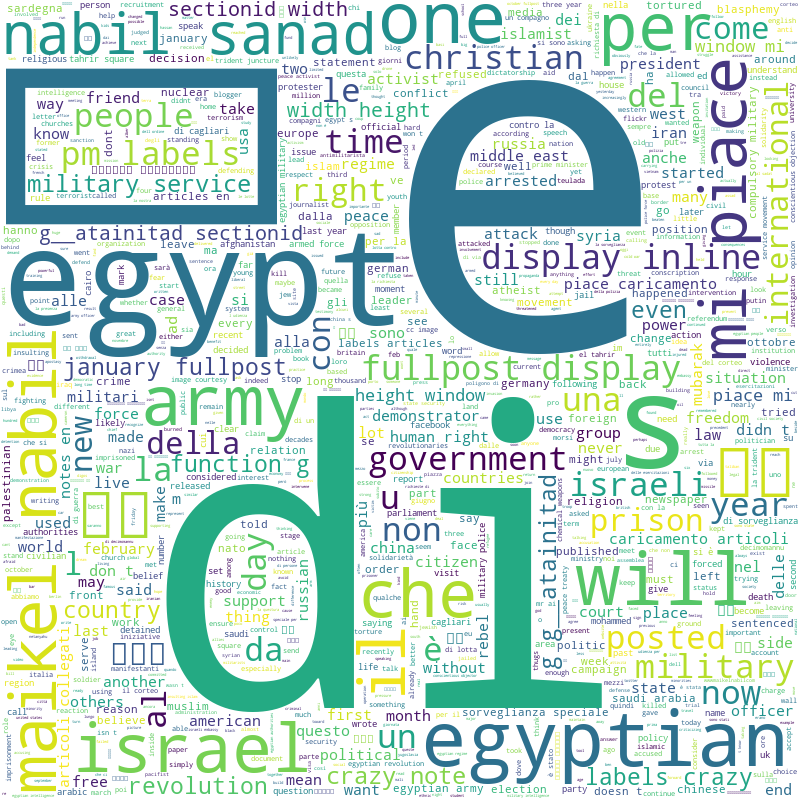

In [6]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(blogPosts['blog_post_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, width=800, contour_width=2, contour_color='steelblue', height=800)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [16]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = blogPosts['blog_post_processed'].values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
# data_words
print(data_words[:1][0][:len(data_words)-1])
words = pd.DataFrame(data_words[:1][0][:len(data_words)-1])
words.to_csv("./results/lda/Indo-pacific-processed-words.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asakinnubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['whether', 'crimean', 'crisis', 'heralds', 'new', 'era', 'international', 'relations', 'clearly', 'pivotal', 'moment', 'russia', 'relationship', 'west', 'world', 'balances', 'power', 'shifting', 'though', 'united', 'states', 'remains', 'unrivalled', 'sheer', 'power', 'close', 'borders', 'rising', 'china', 'increasingly', 'assertive', 'russia', 'allegedly', 'emboldened', 'obama', 'vacillations', 'syria', 'ukraine', 'grey', 'areas', 'emerging', 'states', 'vulnerable', 'revisionist', 'powers', 'alarmed', 'obama', 'hands', 'approach', 'policy', 'neutralism', 'appears', 'increasingly', 'worthy', 'revival', 'neutralism', 'defined', 'cold', 'war', 'foreign', 'policy', 'pioneered', 'finland', 'later', 'adopted', 'josip', 'tito', 'yugoslavia', 'following', 'split', 'stalin', 'geographically', 'sandwiched', 'two', 'antagonistic', 'blocs', 'neutralism', 'prescribed', 'balanced', 'relationships', 'side', 'neutral', 'states', 'reaped', 'rewards', 'otherwise', 'reserved', 'paid', 'members', 'either

In [17]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:len(corpus)-1])
corpus_terms_m = pd.DataFrame(corpus[:1][0][:len(corpus)-1])
corpus_terms_m.to_csv("./results/lda/Indo-pacific-processed-corpus_terms_m.csv")

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 4), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 2),

In [18]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_ld_df = pd.DataFrame(doc_lda)
doc_ld_df.to_csv("./results/lda/Indo-pacific-processed-doc_lda.csv")

[(0,
  '0.007*"di" + 0.007*"egypt" + 0.006*"egyptian" + 0.006*"military" + '
  '0.004*"la" + 0.004*"il" + 0.003*"army" + 0.003*"per" + 0.003*"sanad" + '
  '0.003*"posted"'),
 (1,
  '0.008*"di" + 0.005*"la" + 0.004*"il" + 0.003*"would" + 0.003*"israel" + '
  '0.003*"che" + 0.003*"al" + 0.003*"un" + 0.003*"iran" + 0.003*"per"'),
 (2,
  '0.011*"di" + 0.008*"la" + 0.005*"il" + 0.005*"che" + 0.004*"egyptian" + '
  '0.004*"per" + 0.004*"egypt" + 0.004*"في" + 0.004*"military" + 0.004*"army"'),
 (3,
  '0.008*"di" + 0.007*"military" + 0.006*"egypt" + 0.004*"la" + '
  '0.004*"egyptian" + 0.003*"في" + 0.003*"non" + 0.003*"per" + 0.003*"army" + '
  '0.003*"le"'),
 (4,
  '0.015*"di" + 0.008*"la" + 0.005*"un" + 0.005*"che" + 0.005*"piace" + '
  '0.005*"mi" + 0.004*"per" + 0.004*"il" + 0.004*"في" + 0.004*"le"'),
 (5,
  '0.015*"di" + 0.009*"la" + 0.007*"che" + 0.007*"il" + 0.007*"per" + '
  '0.006*"un" + 0.006*"del" + 0.005*"mi" + 0.004*"le" + 0.004*"piace"'),
 (6,
  '0.012*"egyptian" + 0.008*"militar

In [10]:
%pip install pyldavis


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import matplotlib.pyplot as plt

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/lda/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

c:\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.056076 -0.007184       1        1  30.521969
8     -0.004335  0.010357       2        1  29.238956
3     -0.044215 -0.002953       3        1  12.161101
9     -0.000560 -0.025637       4        1   7.500599
4     -0.029162 -0.001787       5        1   6.784755
5      0.013876  0.013034       6        1   3.928281
7      0.012334  0.010795       7        1   3.820326
6     -0.009939  0.006650       8        1   3.091339
2      0.006718  0.000025       9        1   1.961732
1     -0.000795 -0.003301      10        1   0.990942, topic_info=          Term        Freq       Total Category  logprob  loglift
9421        di  535.000000  535.000000  Default  30.0000  30.0000
9433        la  282.000000  282.000000  Default  29.0000  29.0000
162   military  239.000000  239.000000  Default  28.0000  28.0000
2575  egyptian  240.000000  240.000000  Default  27.0000  27.0000
9430        il  222.000000  222.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
9418     della    0.900602  100.462806  Topic10  -6.3163  -0.1002
1156     years    0.828194   80.363821  Topic10  -6.4002   0.0392
782       time    0.813308   76.105876  Topic10  -6.4183   0.0755
9463        si    0.862737  129.904925  Topic10  -6.3593  -0.4002
793         un    0.860702  176.560218  Topic10  -6.3617  -0.7094

[771 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
6076      2  0.615537    abbas
339       1  0.073175  account
339       2  0.219524  account
339       3  0.365874  account
339       5  0.073175  account
...     ...       ...      ...
9374      3  0.602399   هدامين
9136      3  0.602631  يتحدثون
9130      4  0.759173    يحتفل
9110      2  0.443821     يوذي
9375      3  0.602524   يومنون

[1582 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 4, 10, 5, 6, 8, 7, 3, 2])